## Waste Management using CNN Model

pip install opencv-python

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [21]:
test_path = "DATASET/TEST"
train_path = "DATASET/TRAIN"

In [22]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [46]:
# Visualization
# from cv2 import cvtColor
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    files = glob(category+'/*')
    for file in tqdm(files[:len(files)//5]):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 1999/1999 [00:13<00:00, 144.95it/s]


In [47]:
data.shape

(4512, 2)

In [48]:
from collections import Counter
Counter(y_data)

Counter({'TRAIN\\O': 2513, 'TRAIN\\R': 1999})

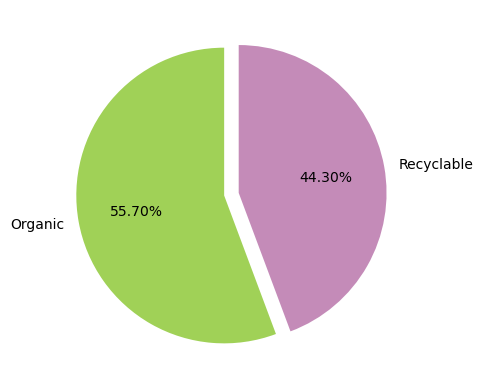

In [49]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

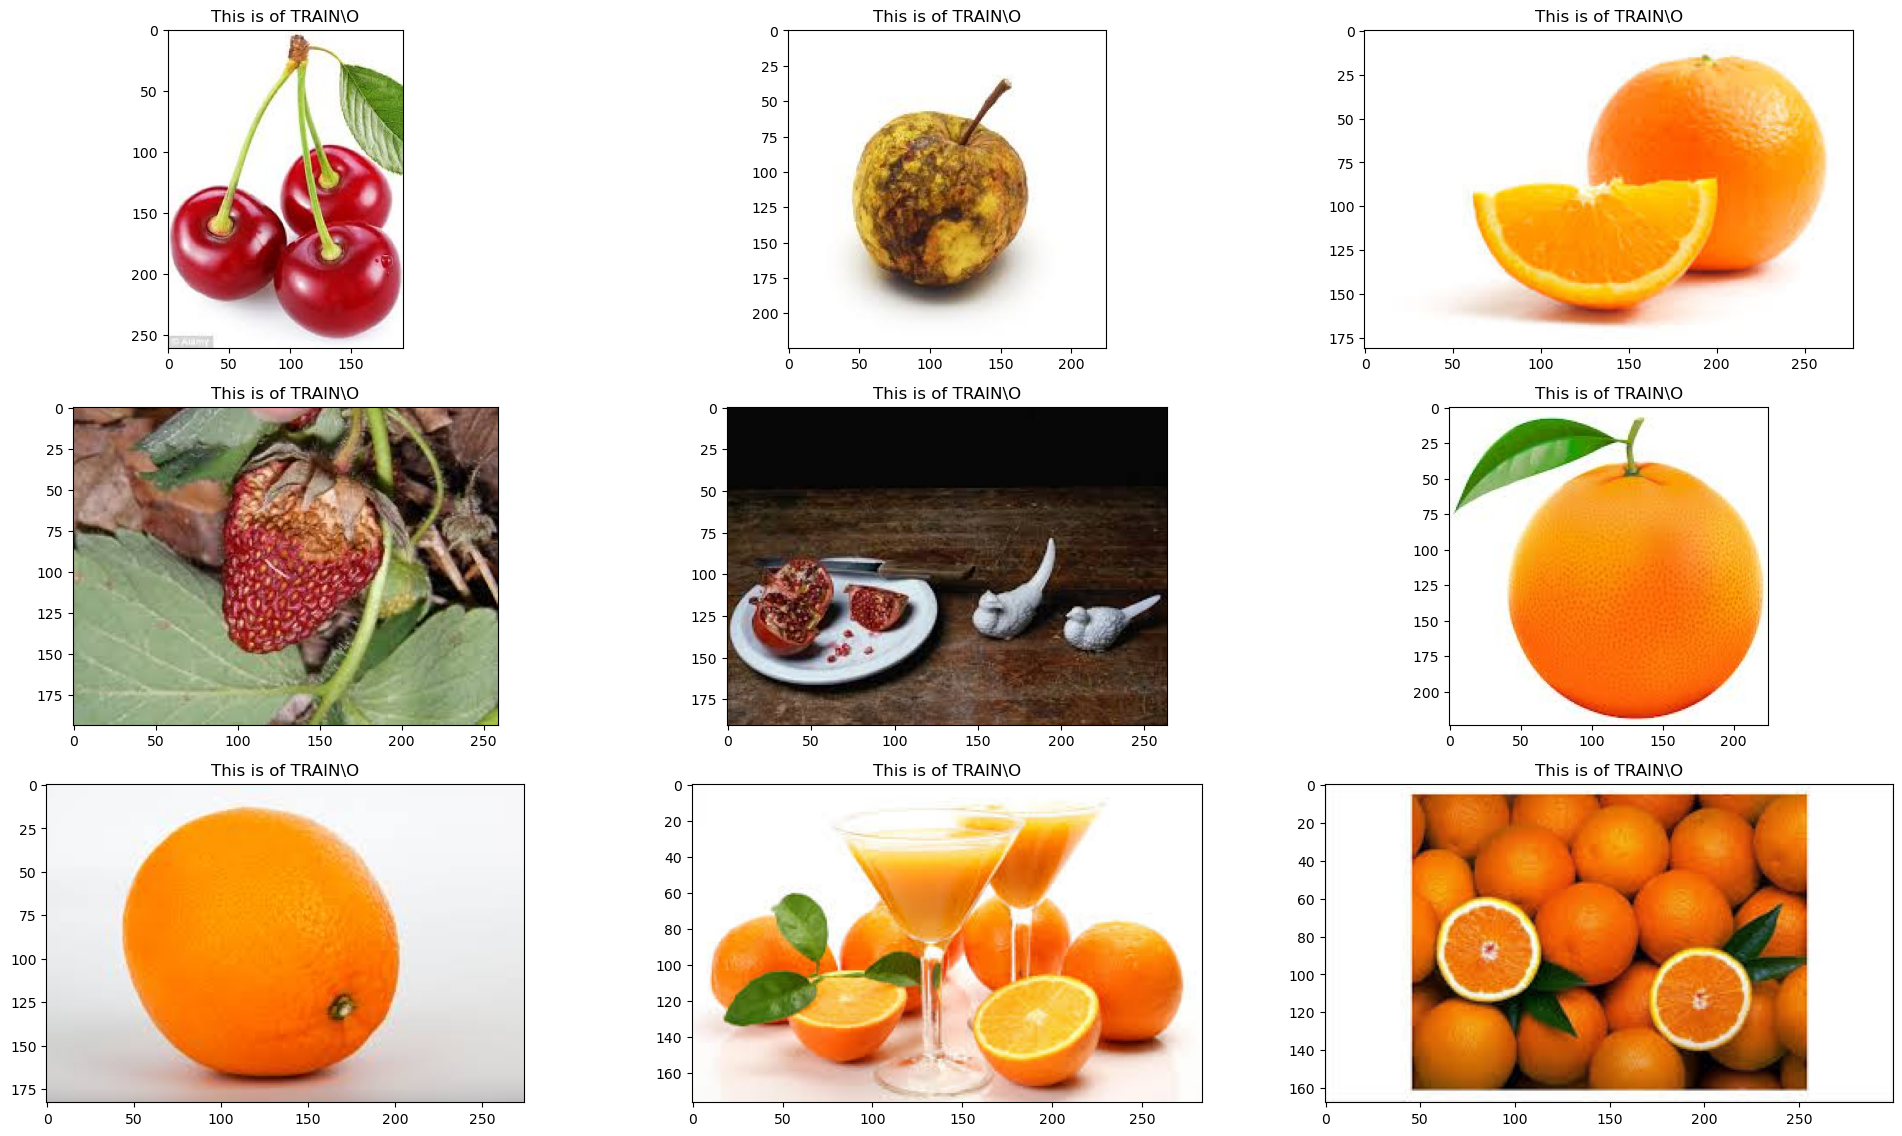

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(10000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [74]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 32

In [75]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [77]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
# Define the data generators with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.6)  # Use 50% of data for training
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.6)   # Use 50% of data for testing

# Load a subset of the training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset='training')  # Use the training subset

# Load a subset of the testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    subset='validation')  # Use the validation subset

Found 9026 images belonging to 2 classes.
Found 1507 images belonging to 2 classes.


In [80]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)


Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.8281 - loss: 0.4266 - val_accuracy: 0.8580 - val_loss: 0.3413
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.8572 - loss: 0.3427 - val_accuracy: 0.6224 - val_loss: 0.9503
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.8644 - loss: 0.3272 - val_accuracy: 0.8288 - val_loss: 0.3747
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 261s 920ms/step - accuracy: 0.8904 - loss: 0.2715 - val_accuracy: 0.7644 - val_loss: 0.5320
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 268s 947ms/step - accuracy: 0.9065 - loss: 0.2448 - val_accuracy: 0.8003 - val_loss: 0.4452
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.9152 - loss: 0.2322 - val_accuracy: 0.8301 - val_loss: 0.4356
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 258s 913ms/step - accuracy: 0.9301 - loss: 0.1782 - val_accuracy: 0.8062 - val_loss: 0.5085
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 258s 911ms/step - accuracy: 0.9400 - loss: 0.159

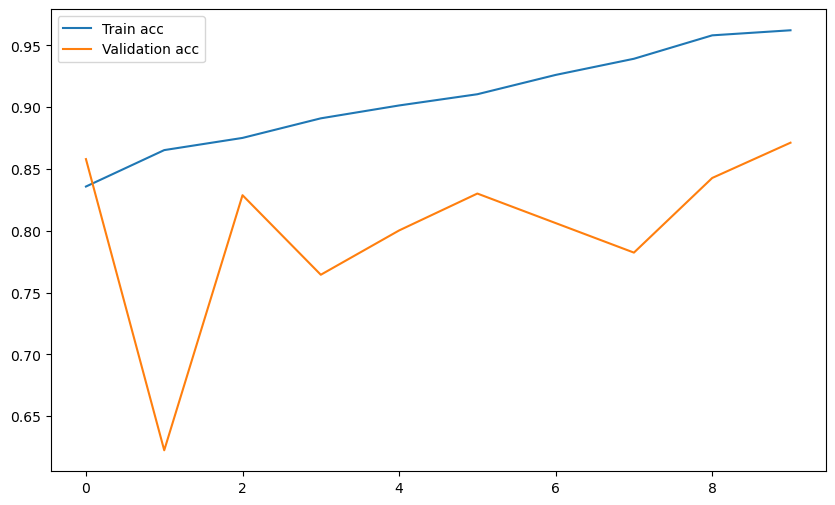

In [81]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

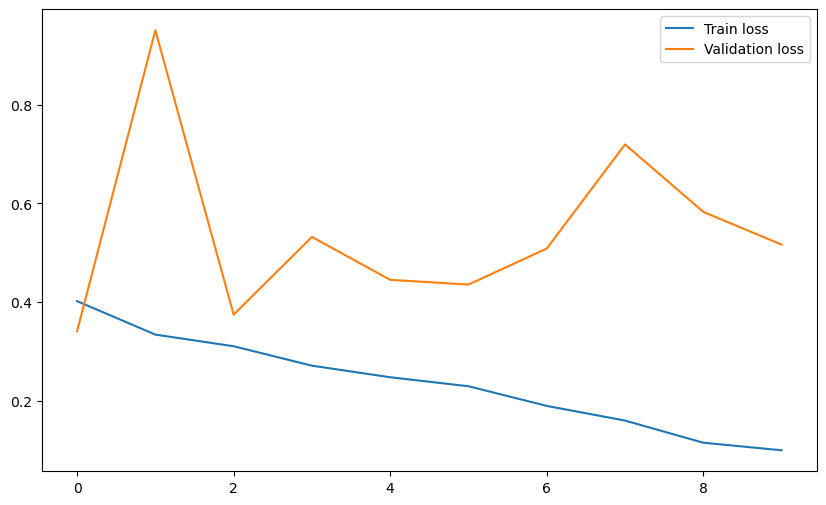

In [82]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [83]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
This image shows organic waste


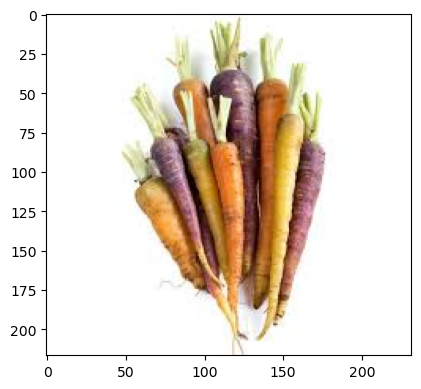

In [85]:
test_img = cv2.imread("DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
This image shows organic waste


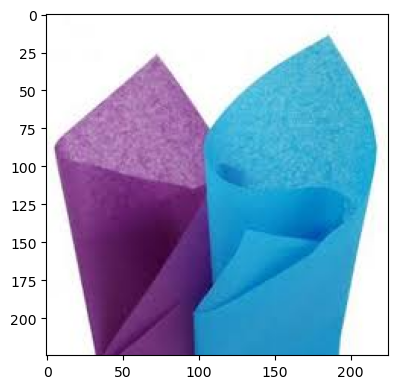

In [86]:
test_img = cv2.imread("DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)